In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

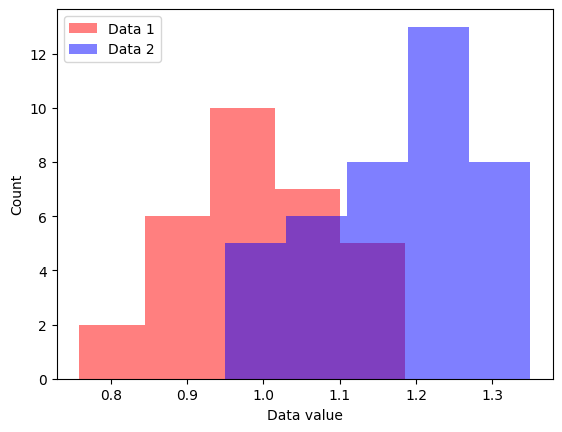

In [3]:
## generate the data

# parameters

n1 = 30  #samples in dataset1
n2 = 40 #and2
mu1 = 1 # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2

#generate the data
data1 = mu1 + np.random.randn(n1)/10 # 표준편차를 줄이면 그 중앙밀집도가 상승하므로, 두 개체가 명확하게 밀집한다.
data2 = mu2 + np.random.randn(n2)/10

# show their histograms
plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1')
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [4]:
## now for the t-test
t,p =stats.ttest_ind(data1,data2,equal_var=True) # 독립 2 표본 t-test

df = n1+n2-2
print('t(%g) = %g, p=%g'%(df,t,p))

t(68) = -6.98675, p=1.4986e-09


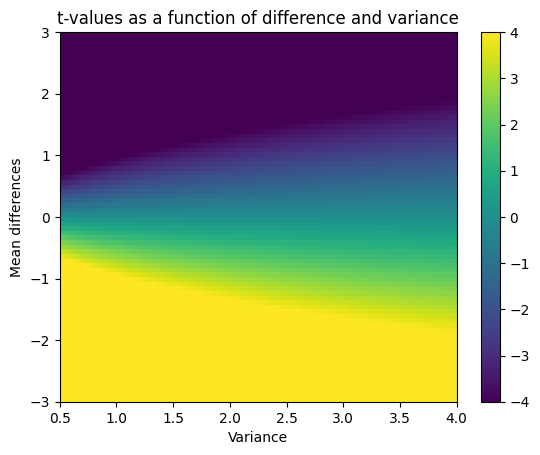

In [29]:
## a 2D space of t values

# ranges for t-value parameters
meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs),len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):

        # t-value denominator
        df = n1 + n2 - 2
        s  = np.sqrt(((n1 - 1)*pooledvar[vari] + (n2- 1 )*pooledvar[vari])/df)
        t_den = s * np.sqrt(1/n1+1/n2)

        # t-value in the matrix
        allTvals[meani,vari] = meandiffs[meani] / t_den

plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()


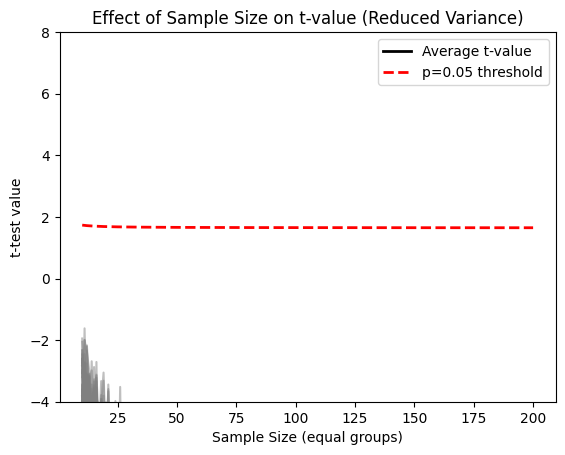

In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 그룹 평균 설정 (고정)
groupAmean = 1
groupBmean = 1.2  # 평균 차이를 고정

# 분산(표준편차) 설정 (변동성을 줄임)
std_dev = 0.1  # 표준편차를 0.1로 줄여서 그룹 간 차이를 더 명확하게

# 샘플 크기 범위 및 반복 수 설정
sampleSize = range(10, 201)  # 10에서 200까지의 샘플 크기
iterSize = range(100)  # 100번 반복

# t-값과 p-값 저장을 위한 배열 초기화
t_values = np.zeros((len(sampleSize), len(iterSize)))
p_values = np.zeros((len(sampleSize), len(iterSize)))

# 샘플 크기마다 t-값 및 p-값 계산
for idx, size in enumerate(sampleSize):
    for i in iterSize:
        # 각 그룹에 대해 표준편차를 줄인 랜덤 데이터 생성
        data1 = np.random.randn(size) * std_dev + groupAmean
        data2 = np.random.randn(size) * std_dev + groupBmean
        
        # 독립 2표본 t-검정
        t, p = stats.ttest_ind(data1, data2, equal_var=True)
        
        # t-값과 p-값 저장
        t_values[idx, i] = t
        p_values[idx, i] = p

# t-값과 p-값의 평균을 구해 그래프에 표시하기
mean_t_values = np.mean(t_values, axis=1)
mean_p_values = np.mean(p_values, axis=1)

# 모든 t-값을 회색으로 그리기
plt.plot(list(sampleSize), t_values, color='gray', alpha=0.5)

# 평균 t-값을 검은색으로 그리기
plt.plot(list(sampleSize), mean_t_values, color='black', linewidth=2, label='Average t-value')

# p=0.05에 해당하는 임계 t-값 계산 및 빨간색으로 그리기
df = np.array(list(sampleSize)) * 2 - 2  # 두 그룹의 자유도 계산
critical_t_values = stats.t.ppf(1 - 0.05, df)  # p=0.05에 해당하는 t-값 계산
plt.plot(list(sampleSize), critical_t_values, color='red', linestyle='--', linewidth=2, label='p=0.05 threshold')

# 그래프 설정
plt.xlabel('Sample Size (equal groups)')
plt.ylabel('t-test value')
plt.title('Effect of Sample Size on t-value (Reduced Variance)')
plt.ylim([-4, 8])  # Y축 범위 설정

plt.legend()
plt.show()